In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load your dataset
file_path = 'global_inflation_data.csv'  # Replace with the actual path to your CSV file
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
print("First few rows of the dataframe:")
print(df.head())

# Get basic information about the dataframe
print("\nInformation about the dataframe:")
print(df.info())

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

First few rows of the dataframe:
  country_name                                   indicator_name  1980  1981  \
0  Afghanistan  Annual average inflation (consumer prices) rate  13.4  22.2   
1      Albania  Annual average inflation (consumer prices) rate   NaN   NaN   
2      Algeria  Annual average inflation (consumer prices) rate   9.7  14.6   
3      Andorra  Annual average inflation (consumer prices) rate   NaN   NaN   
4       Angola  Annual average inflation (consumer prices) rate  46.7   1.4   

   1982  1983  1984  1985  1986  1987  ...  2015   2016   2017   2018  2019  \
0  18.2  15.9  20.4   8.7  -2.1  18.4  ... -0.66   4.38   4.98   0.63   2.3   
1   NaN   NaN   NaN   NaN   NaN   NaN  ...  1.90   1.30   2.00   2.00   1.4   
2   6.6   7.8   6.3  10.4  14.0   5.9  ...  4.80   6.40   5.60   4.30   2.0   
3   NaN   NaN   NaN   NaN   NaN   NaN  ... -1.10  -0.40   2.60   1.00   0.5   
4   1.8   1.8   1.8   1.8   1.8   1.8  ...  9.20  30.70  29.80  19.60  17.1   

    2020   2021  

In [5]:
# Drop the 'indicator_name' column
df = df.drop('indicator_name', axis=1)

# Identify the year columns
year_columns = [str(year) for year in range(1980, 2025)]

# Drop rows where any of the year columns have missing values
df_cleaned = df.dropna(subset=year_columns)

# Display the shape of the cleaned dataframe and the remaining missing values
print("Shape of the cleaned dataframe:", df_cleaned.shape)
print("\nMissing values in the cleaned dataframe:")
print(df_cleaned.isnull().sum())

# Display the first few rows of the cleaned dataframe
print("\nFirst few rows of the cleaned dataframe:")
print(df_cleaned.head())

Shape of the cleaned dataframe: (136, 46)

Missing values in the cleaned dataframe:
country_name    0
1980            0
1981            0
1982            0
1983            0
1984            0
1985            0
1986            0
1987            0
1988            0
1989            0
1990            0
1991            0
1992            0
1993            0
1994            0
1995            0
1996            0
1997            0
1998            0
1999            0
2000            0
2001            0
2002            0
2003            0
2004            0
2005            0
2006            0
2007            0
2008            0
2009            0
2010            0
2011            0
2012            0
2013            0
2014            0
2015            0
2016            0
2017            0
2018            0
2019            0
2020            0
2021            0
2022            0
2023            0
2024            0
dtype: int64

First few rows of the cleaned dataframe:
           country_name  1980  19

In [6]:
# Define the feature columns (years 1980 to 2023)
feature_columns = [str(year) for year in range(1980, 2024)]

# Define the target column (year 2024)
target_column = '2024'

# Create the features (X) and the target (y)
X = df_cleaned[feature_columns]
y = df_cleaned[target_column]
countries = df_cleaned['country_name']  # Keep track of country names

# Display the first few rows of the features and the target
print("First few rows of the features (X):")
print(X.head())

print("\nFirst few values of the target (y):")
print(y.head())

print("\nFirst few country names:")
print(countries.head())

First few rows of the features (X):
    1980  1981  1982  1983  1984  1985  1986  1987  1988  1989  ...  2014  \
2    9.7  14.6   6.6   7.8   6.3  10.4  14.0   5.9   5.9   9.2  ...   2.9   
4   46.7   1.4   1.8   1.8   1.8   1.8   1.8   1.8   1.8   1.8  ...   7.3   
5   19.0  11.5   4.2   2.3   3.8   1.0   0.5   3.6   6.8   4.4  ...   1.1   
9   10.1   9.5  11.4  10.0   4.0   6.7   9.1   8.5   7.3   7.6  ...   2.5   
10   6.3   6.8   5.4   3.3   5.7   3.2   1.7   1.4   1.9   2.2  ...   1.5   

    2015  2016  2017  2018  2019  2020  2021  2022  2023  
2    4.8   6.4   5.6   4.3   2.0   2.4   7.2   9.3   9.0  
4    9.2  30.7  29.8  19.6  17.1  22.3  25.8  21.4  13.1  
5    1.0  -0.5   2.4   1.2   1.4   1.1   1.6   7.5   5.0  
9    1.5   1.3   2.0   1.9   1.6   0.9   2.8   6.6   5.8  
10   0.8   1.0   2.2   2.1   1.5   1.4   2.8   8.6   7.8  

[5 rows x 44 columns]

First few values of the target (y):
2      6.8
4     22.3
5      2.9
9      4.0
10     3.7
Name: 2024, dtype: float64

Firs

In [7]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test, countries_train, countries_test = train_test_split(
    X, y, countries, test_size=0.2, random_state=42  # Set a random state for reproducibility
)

# Print the shapes of the resulting datasets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)
print("Shape of countries_train:", countries_train.shape)
print("Shape of countries_test:", countries_test.shape)

Shape of X_train: (108, 44)
Shape of X_test: (28, 44)
Shape of y_train: (108,)
Shape of y_test: (28,)
Shape of countries_train: (108,)
Shape of countries_test: (28,)


In [8]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)  # Set a random state for reproducibility

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Evaluate the model on the test data
r_squared = rf_model.score(X_test, y_test)
print(f"R-squared on the test set: {r_squared:.4f}")

R-squared on the test set: 0.3019


In [9]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation on the training data
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='r2')

# Print the cross-validation scores
print("Cross-validation R-squared scores:", cv_scores)
print(f"Average cross-validation R-squared score: {cv_scores.mean():.4f}")
print(f"Standard deviation of cross-validation R-squared scores: {cv_scores.std():.4f}")

Cross-validation R-squared scores: [-0.46280709  0.42882302  0.07044264  0.58886871 -0.48681826]
Average cross-validation R-squared score: 0.0277
Standard deviation of cross-validation R-squared scores: 0.4434


In [10]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters and their possible values to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'max_features': ['sqrt', 'log2', None]
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='r2',
                           n_jobs=-1)  # Use all available cores

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best hyperparameters found by GridSearchCV:")
print(grid_search.best_params_)

# Get the best model
best_rf_model = grid_search.best_estimator_

# Evaluate the best model on the test set
best_r_squared = best_rf_model.score(X_test, y_test)
print(f"\nR-squared on the test set with the best model: {best_r_squared:.4f}")

Best hyperparameters found by GridSearchCV:
{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

R-squared on the test set with the best model: 0.2683


In [11]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the Gradient Boosting Regressor model
gbr_model = GradientBoostingRegressor(random_state=42)

# Train the model on the training data
gbr_model.fit(X_train, y_train)

# Evaluate the model on the test data
gbr_r_squared = gbr_model.score(X_test, y_test)
print(f"R-squared on the test set with Gradient Boosting Regressor: {gbr_r_squared:.4f}")


R-squared on the test set with Gradient Boosting Regressor: 0.4833


In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Define the hyperparameters and their possible values to tune
param_grid_gbr = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2],
    'subsample': [0.8, 1.0]
}

# Initialize the GridSearchCV object for Gradient Boosting Regressor
grid_search_gbr = GridSearchCV(estimator=GradientBoostingRegressor(random_state=42),
                                param_grid=param_grid_gbr,
                                cv=5,
                                scoring='r2',
                                n_jobs=-1)  # Use all available cores

# Fit the GridSearchCV object to the training data
grid_search_gbr.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best hyperparameters found by GridSearchCV for Gradient Boosting Regressor:")
print(grid_search_gbr.best_params_)

# Get the best model
best_gbr_model = grid_search_gbr.best_estimator_

# Evaluate the best model on the test set
best_gbr_r_squared = best_gbr_model.score(X_test, y_test)
print(f"\nR-squared on the test set with the best Gradient Boosting model: {best_gbr_r_squared:.4f}")

Best hyperparameters found by GridSearchCV for Gradient Boosting Regressor:
{'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 0.8}

R-squared on the test set with the best Gradient Boosting model: 0.3819


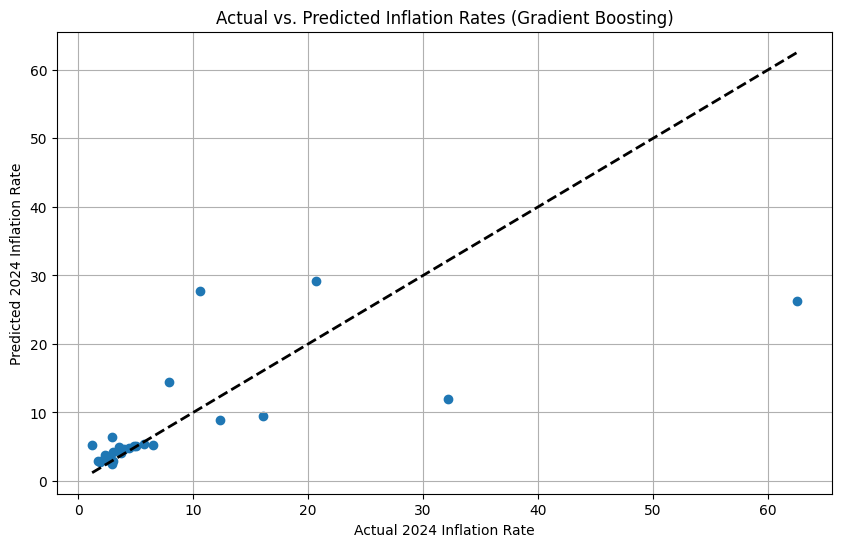


Sample of Predictions:
                  Country  Actual  Predicted
99                  Libya     2.9   6.379086
62            Gambia, The    12.3   8.947642
78              Indonesia     2.5   3.639698
59                Finland     1.9   2.708187
184  United Arab Emirates     2.3   3.239777


In [13]:
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
import numpy as np

# Initialize the Gradient Boosting Regressor with default parameters
final_gbr_model = GradientBoostingRegressor(random_state=42)

# Train the final model on the entire training dataset
final_gbr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = final_gbr_model.predict(X_test)

# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Diagonal line for perfect predictions
plt.xlabel('Actual 2024 Inflation Rate')
plt.ylabel('Predicted 2024 Inflation Rate')
plt.title('Actual vs. Predicted Inflation Rates (Gradient Boosting)')
plt.grid(True)
plt.show()

# Print some of the predictions along with the actual values and country names
predictions_df = pd.DataFrame({'Country': countries_test, 'Actual': y_test, 'Predicted': y_pred})
print("\nSample of Predictions:")
print(predictions_df.head())

R-squared on the test set with XGBoost Regressor: -0.6773


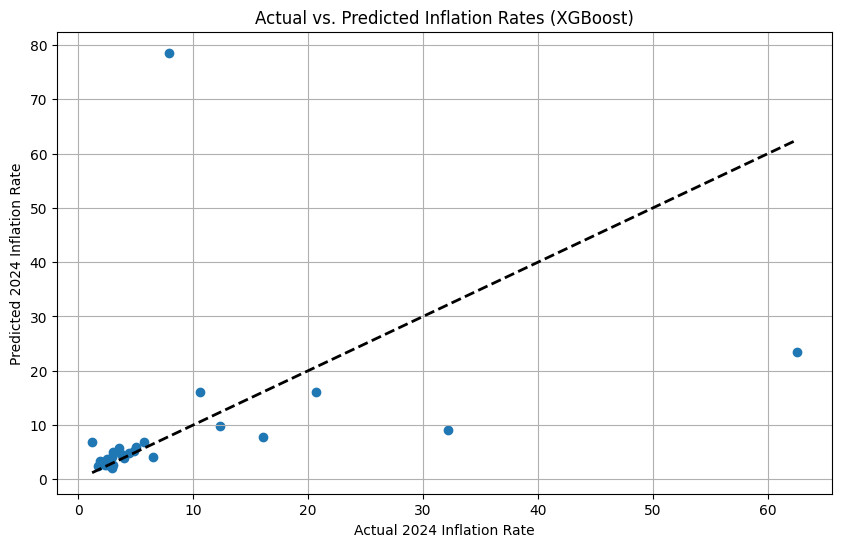


Sample of Predictions (XGBoost):
                  Country  Actual  Predicted
99                  Libya     2.9   4.012532
62            Gambia, The    12.3   9.858088
78              Indonesia     2.5   3.747294
59                Finland     1.9   3.285102
184  United Arab Emirates     2.3   2.592210


In [14]:
import xgboost as xgb
import pandas as pd
import matplotlib.pyplot as plt

# Initialize the XGBoost Regressor model
xgb_model = xgb.XGBRegressor(random_state=42)

# Train the model on the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model on the test set
r_squared_xgb = xgb_model.score(X_test, y_test)
print(f"R-squared on the test set with XGBoost Regressor: {r_squared_xgb:.4f}")

# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Diagonal line for perfect predictions
plt.xlabel('Actual 2024 Inflation Rate')
plt.ylabel('Predicted 2024 Inflation Rate')
plt.title('Actual vs. Predicted Inflation Rates (XGBoost)')
plt.grid(True)
plt.show()

# Print some of the predictions along with the actual values and country names
predictions_df_xgb = pd.DataFrame({'Country': countries_test, 'Actual': y_test, 'Predicted': y_pred_xgb})
print("\nSample of Predictions (XGBoost):")
print(predictions_df_xgb.head())

In [15]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Define the hyperparameters and their possible values to tune
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

# Initialize the GridSearchCV object for XGBoost Regressor
grid_search_xgb = GridSearchCV(estimator=xgb.XGBRegressor(random_state=42),
                              param_grid=param_grid_xgb,
                              cv=5,
                              scoring='r2',
                              n_jobs=-1)  # Use all available cores

# Fit the GridSearchCV object to the training data
grid_search_xgb.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best hyperparameters found by GridSearchCV for XGBoost Regressor:")
print(grid_search_xgb.best_params_)

# Get the best model
best_xgb_model = grid_search_xgb.best_estimator_

# Evaluate the best model on the test set
best_xgb_r_squared = best_xgb_model.score(X_test, y_test)
print(f"\nR-squared on the test set with the best XGBoost model: {best_xgb_r_squared:.4f}")

Best hyperparameters found by GridSearchCV for XGBoost Regressor:
{'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}

R-squared on the test set with the best XGBoost model: 0.3052
